In [1]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=952116;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=609175;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /Users/victor.apolonio/code/sysbiolab/hexcore-project.                                
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=80279;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=827718;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project hexcore-project                                          ]8;id=909218;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=925004;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=301796;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=109498;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=677988;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=268898;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [2]:
multi_tissue_tumor_microenvironment_atlas = catalog.load('multi_tissue_tumor_microenvironment_atlas')

[03/09/25 20:17:24] INFO     Loading data from multi_tissue_tumor_microenvironment_atlas        ]8;id=802722;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=436288;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/io/data_catalog.py#390\390]8;;\
                             (AnnDataset)...                                                                       

In [8]:
adata_ref = catalog.load('adata_ref')

[03/09/25 20:25:52] INFO     Loading data from adata_ref (AnnDataset)...                        ]8;id=118871;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=148011;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/io/data_catalog.py#390\390]8;;\

In [4]:
adata_ref.shape

(1000, 12470)

In [5]:
X_dense = adata_ref.X.toarray()

In [6]:
import numpy as np

print(np.min(X_dense), np.max(X_dense), np.isnan(X_dense).sum())

0.0 8.638803492894349 0


In [15]:
import scanpy as sc
# Read data
adata_ref_original = sc.read(
    f'./data/sc.h5ad',
    backup_url='https://cell2location.cog.sanger.ac.uk/paper/integrated_lymphoid_organ_scrna/RegressionNBV4Torch_57covariates_73260cells_10237genes/sc.h5ad'
)

adata_ref = catalog.load('adata_ref')

[03/09/25 20:47:08] INFO     Loading data from adata_ref (AnnDataset)...                        ]8;id=144166;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=66910;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/io/data_catalog.py#390\390]8;;\

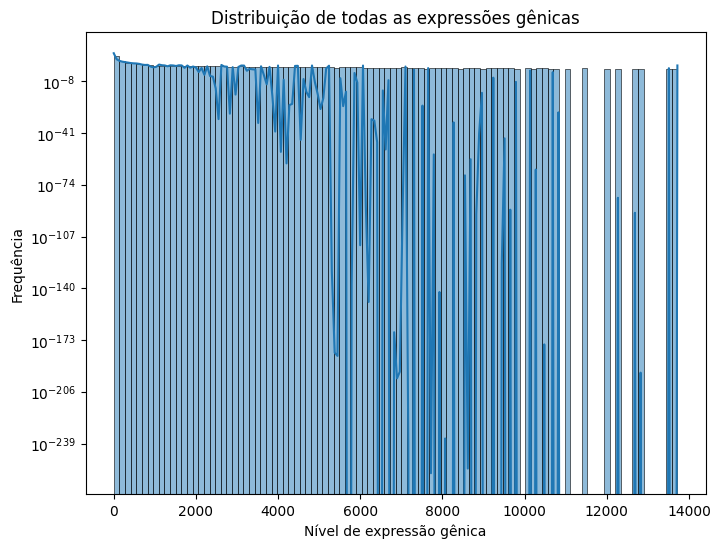

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
%matplotlib inline
# Converte para array denso, se for uma matriz esparsa
if scipy.sparse.issparse(adata_ref_original.X):
    gene_expression_values = adata_ref_original.X.toarray().flatten()
else:
    gene_expression_values = adata_ref_original.X.flatten()

# Filtra valores maiores que zero
gene_expression_values = gene_expression_values[gene_expression_values > 0]

# Cria o histograma
plt.figure(figsize=(8, 6))
sns.histplot(gene_expression_values, bins=100, kde=True)

plt.xlabel("Nível de expressão gênica")
plt.ylabel("Frequência")
plt.title("Distribuição de todas as expressões gênicas")
plt.yscale("log")  # Escala logarítmica no eixo Y para melhor visualização

plt.show()

In [26]:
adata_ref


AnnData object with n_obs × n_vars = 1000 × 12481
    obs: 'nCount_RNA', 'nFeature_RNA', 'harm_study', 'harm_healthy.tissue', 'harm_tumor.site', 'harm_sample.type', 'harm_condition', 'harm_tumor.type', 'harm_cd45pos', 'harm_healthy.pat', 'percent.mt', 'ratio_nCount_nFeature', 'batch', 'X_scvi_batch', 'X_scvi_labels', 'X_scvi_local_l_mean', 'X_scvi_local_l_var', 'leiden_0.2', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1', 'leiden_1.2', 'leiden_1.4', 'author_first_cell_type', 'author_cell_type', 'cnv_score', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'assay_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'featu

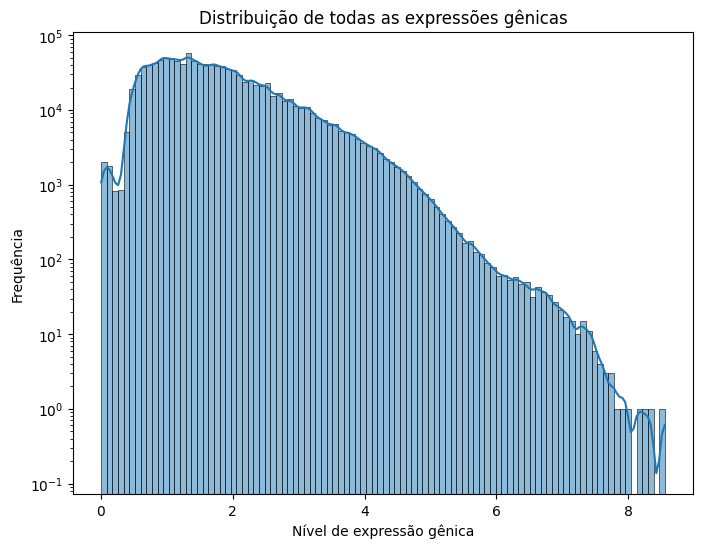

In [24]:
# Converte para array denso, se for uma matriz esparsa
if scipy.sparse.issparse(adata_ref.X):
    gene_expression_values = adata_ref.X.toarray().flatten()
else:
    gene_expression_values = adata_ref.X.flatten()

# Filtra valores maiores que zero
gene_expression_values = gene_expression_values[gene_expression_values > 0]

# Cria o histograma
plt.figure(figsize=(8, 6))
sns.histplot(gene_expression_values, bins=100, kde=True)

plt.xlabel("Nível de expressão gênica")
plt.ylabel("Frequência")
plt.title("Distribuição de todas as expressões gênicas")
plt.yscale("log")  # Escala logarítmica no eixo Y para melhor visualização

plt.show()

In [29]:
import numpy as np
import scanpy as sc
import scipy.sparse as sp
from anndata import AnnData

def desnormalize_log1p(adata: AnnData) -> AnnData:
    """
    Aplica a transformação inversa de log1p (exp(x) - 1) para recuperar valores aproximados das contagens originais.

    Parâmetros:
    - adata: AnnData contendo a matriz de expressão gênica normalizada com log1p.

    Retorna:
    - Um novo objeto AnnData com a matriz desnormalizada.
    """
    adata = adata.copy()  # Evita modificar o objeto original
    
    if sp.issparse(adata.X):
        adata.X = sp.csr_matrix(np.expm1(adata.X.toarray()))  # Converte para denso antes da transformação
    else:
        adata.X = np.expm1(adata.X)
    
    return adata

In [30]:
teste_desnorm = desnormalize_log1p(adata_ref)

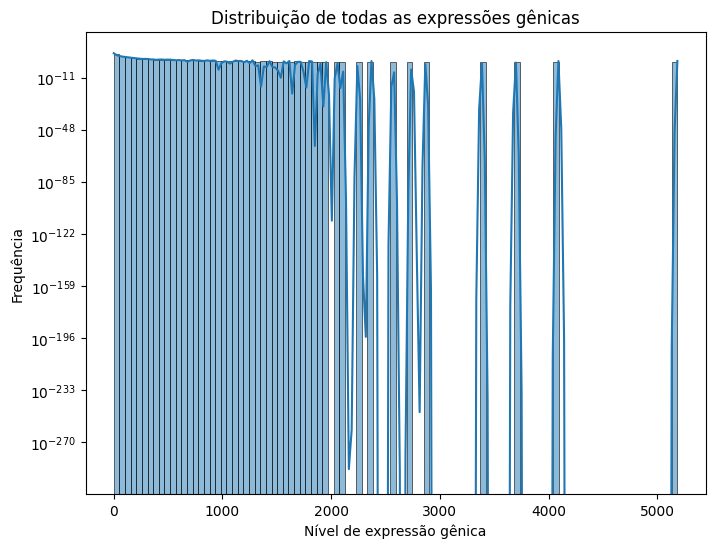

In [31]:
# Converte para array denso, se for uma matriz esparsa
if scipy.sparse.issparse(teste_desnorm.X):
    gene_expression_values = teste_desnorm.X.toarray().flatten()
else:
    gene_expression_values = teste_desnorm.X.flatten()

# Filtra valores maiores que zero
gene_expression_values = gene_expression_values[gene_expression_values > 0]

# Cria o histograma
plt.figure(figsize=(8, 6))
sns.histplot(gene_expression_values, bins=100, kde=True)

plt.xlabel("Nível de expressão gênica")
plt.ylabel("Frequência")
plt.title("Distribuição de todas as expressões gênicas")
plt.yscale("log")  # Escala logarítmica no eixo Y para melhor visualização

plt.show()

[03/09/25 18:31:42] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=984274;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=314275;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/cell2location/utils/                
                             filtering.py:26: ImplicitModificationWarning: Trying to modify                        
                             attribute `.var` of view, initializing view as actual.                                
                               adata.var["n_cells"] = np.array((adata.X > 0).sum(0)).flatten()                     
                                                                                                                   

[03/09/25 18:31:46] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=484165;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=918260;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/pandas/core/arraylik                
                             e.py:399: RuntimeWarning: divide by zero encountered in log10                         
                               result = getattr(ufunc, method)(*inputs, **kwargs)                                  
                                                                                                                   

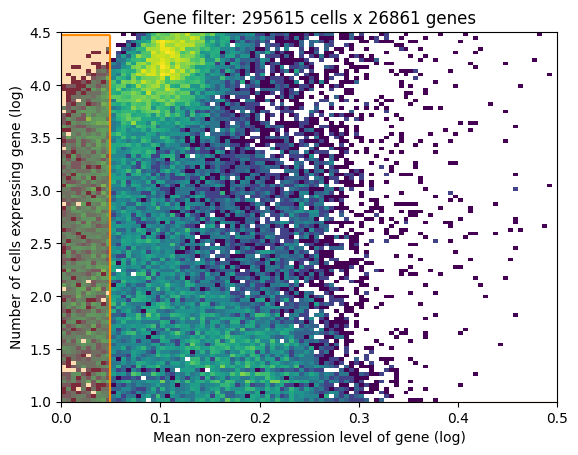

In [77]:
test = setup_adata_ref_signature(multi_tissue_tumor_microenvironment_atlas,
                                {'cell_count_cutoff': 5,
                                 'cell_percentage_cutoff2': 0.1,
                                 'nonz_mean_cutoff': 1.12})

In [ ]:
mari_desnorm = desnormalize_log1p(multi_tissue_tumor_microenvironment_atlas)

In [ ]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(mari_desnorm, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)

# filter the object
mari_desnorm = mari_desnorm[:, selected].copy()

In [79]:
multi_tissue_tumor_microenvironment_atlas.shape

(391963, 45454)

In [12]:
import seaborn as sns
import numpy as np
import cell2location

In [13]:
help(cell2location.models.RegressionModel.setup_anndata)

Help on method setup_anndata in module cell2location.models.reference._reference_model:

setup_anndata(
    adata: anndata._core.anndata.AnnData,
    layer: Optional[str] = None,
    batch_key: Optional[str] = None,
    labels_key: Optional[str] = None,
    categorical_covariate_keys: Optional[List[str]] = None,
    continuous_covariate_keys: Optional[List[str]] = None,
    **kwargs
) class method of cell2location.models.reference._reference_model.RegressionModel
    Sets up the :class:`~anndata.AnnData` object for this model.

    A mapping will be created between data fields used by this model to their respective locations in
    adata. None of the data in adata are modified. Only adds fields to adata.

    Parameters
    ----------
    layer
        if not `None`, uses this as the key in `adata.layers` for raw count data.
    batch_key
        key in `adata.obs` for batch information. Categories will automatically be converted into
        integer categories and saved to `adata.obs[

<Axes: ylabel='Count'>

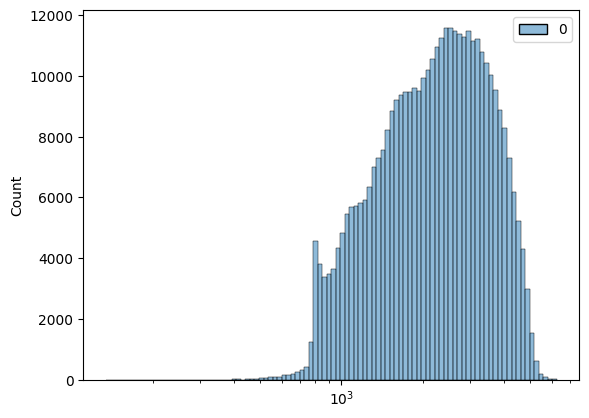

In [55]:
import scanpy as sc

# Normalizar para contagens de 10.000 por célula
sc.pp.normalize_total(multi_tissue_tumor_microenvironment_atlas, target_sum=1e4)

# Aplicar transformação log1p para estabilizar variância
sc.pp.log1p(multi_tissue_tumor_microenvironment_atlas)

# Replotar histograma para checar distribuição
sns.histplot(np.sum(multi_tissue_tumor_microenvironment_atlas.X, axis=1), bins=100, log_scale=True)

[03/09/25 18:10:11] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=991756;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=600601;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/cell2location/utils/                
                             filtering.py:26: ImplicitModificationWarning: Trying to modify                        
                             attribute `.var` of view, initializing view as actual.                                
                               adata.var["n_cells"] = np.array((adata.X > 0).sum(0)).flatten()                     
                                                                                                                   

[03/09/25 18:10:14] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=455054;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=524369;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/pandas/core/arraylik                
                             e.py:399: RuntimeWarning: divide by zero encountered in log10                         
                               result = getattr(ufunc, method)(*inputs, **kwargs)                                  
                                                                                                                   

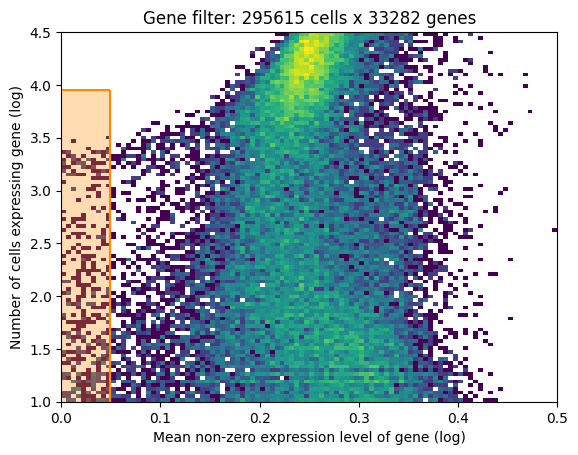

In [25]:
multi_tissue_tumor_microenvironment_atlas.var

,feature_types,genome,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,SYMBOL
gene_ids,,,,,,,,,
ENSG00000243485,Gene Expression,GRCh38,False,MIR1302-2HG,NCBITaxon:9606,gene,623,lncRNA,ENSG00000243485
ENSG00000237613,Gene Expression,GRCh38,False,FAM138A,NCBITaxon:9606,gene,888,lncRNA,ENSG00000237613
ENSG00000186092,Gene Expression,GRCh38,False,OR4F5,NCBITaxon:9606,gene,2618,protein_coding,ENSG00000186092
ENSG00000238009,Gene Expression,GRCh38,False,ENSG00000238009.6,NCBITaxon:9606,gene,629,lncRNA,ENSG00000238009
ENSG00000239945,Gene Expression,GRCh38,False,ENSG00000239945.1,NCBITaxon:9606,gene,1319,lncRNA,ENSG00000239945
...,...,...,...,...,...,...,...,...,...
ENSG00000277836,Gene Expression,GRCh38,False,ENSG00000277836.1,NCBITaxon:9606,gene,288,protein_coding,ENSG00000277836
ENSG00000278633,Gene Expression,GRCh38,False,ENSG00000278633.1,NCBITaxon:9606,gene,2404,protein_coding,ENSG00000278633
ENSG00000276017,Gene Expression,GRCh38,False,ENSG00000276017.1,NCBITaxon:9606,gene,2404,protein_coding,ENSG00000276017


In [21]:
adata_ref.var

,GeneID-2,GeneName-2,feature_types,feature_types-0,feature_types-1,gene_ids-1,gene_ids-4861STDY7135913-0,gene_ids-4861STDY7135914-0,gene_ids-4861STDY7208412-0,gene_ids-4861STDY7208413-0,...,mean_sample_effectSample_BCP003_Total,mean_sample_effectSample_BCP004_Total,mean_sample_effectSample_BCP005_Total,mean_sample_effectSample_BCP006_Total,mean_sample_effectSample_BCP008_Total,mean_sample_effectSample_BCP009_Total,mean_sample_effectSample_Human_colon_16S7255677,mean_sample_effectSample_Human_colon_16S7255678,mean_sample_effectSample_Human_colon_16S8000484,mean_sample_effectSample_Pan_T7935494
NOC2L,ENSG00000188976,16551,nan,Gene Expression,Gene Expression,ENSG00000188976,ENSG00000188976,ENSG00000188976,ENSG00000188976,ENSG00000188976,...,0.024621,0.081671,0.026212,0.036554,0.062046,0.002198,0.005277,0.051860,0.071570,0.005360
HES4,ENSG00000188290,11070,nan,Gene Expression,Gene Expression,ENSG00000188290,ENSG00000188290,ENSG00000188290,ENSG00000188290,ENSG00000188290,...,0.000226,0.000077,0.000084,0.000147,0.001873,0.001898,0.238216,0.416655,0.000570,0.000235
ISG15,ENSG00000187608,12375,nan,Gene Expression,Gene Expression,ENSG00000187608,ENSG00000187608,ENSG00000187608,ENSG00000187608,ENSG00000187608,...,0.076364,0.269649,0.076759,0.353826,0.302668,0.075711,0.163041,0.147128,0.000370,0.002196
TNFRSF18,ENSG00000186891,31000,nan,Gene Expression,Gene Expression,ENSG00000186891,ENSG00000186891,ENSG00000186891,ENSG00000186891,ENSG00000186891,...,0.001377,0.001578,0.019400,0.010306,0.011950,0.005170,0.001284,0.003092,0.003714,0.000049
TNFRSF4,ENSG00000186827,30985,nan,Gene Expression,Gene Expression,ENSG00000186827,ENSG00000186827,ENSG00000186827,ENSG00000186827,ENSG00000186827,...,0.001522,0.016071,0.006540,0.017655,0.007901,0.006553,0.176486,0.001475,0.036219,0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IGL_VDJsum,IGL_VDJsum,IGL_VDJsum,Gene Expression,Gene Expression,Gene Expression,IGL_VDJsum,IGL_VDJsum,IGL_VDJsum,IGL_VDJsum,IGL_VDJsum,...,0.128374,0.037641,0.543056,0.029002,1.499754,0.079273,0.000112,0.004888,0.002673,0.049770
TCRA_VDJsum,TCRA_VDJsum,TCRA_VDJsum,Gene Expression,Gene Expression,Gene Expression,TCRA_VDJsum,TCRA_VDJsum,TCRA_VDJsum,TCRA_VDJsum,TCRA_VDJsum,...,0.001987,0.002853,0.014872,0.008167,0.006199,0.002744,1.564915,0.025964,0.001321,0.026457
TCRB_VDJsum,TCRB_VDJsum,TCRB_VDJsum,Gene Expression,Gene Expression,Gene Expression,TCRB_VDJsum,TCRB_VDJsum,TCRB_VDJsum,TCRB_VDJsum,TCRB_VDJsum,...,0.015966,0.005596,0.035681,0.014690,0.039490,0.003979,0.002934,0.002907,0.005710,0.029042
TCRD_VDJsum,TCRD_VDJsum,TCRD_VDJsum,Gene Expression,Gene Expression,Gene Expression,TCRD_VDJsum,TCRD_VDJsum,TCRD_VDJsum,TCRD_VDJsum,TCRD_VDJsum,...,0.000542,0.000684,0.000861,0.003318,0.000150,0.001001,0.000158,0.004130,0.000021,0.000110


In [82]:
from cell2location.utils.filtering import filter_genes
import scanpy as sc

def setup_adata_ref_signature(multi_tissue_tumor_microenvironment_atlas, adata_ref_params):
    
    # rename genes to ENSEMBL ID for correct matching between single cell and spatial data
    multi_tissue_tumor_microenvironment_atlas.var['SYMBOL'] = multi_tissue_tumor_microenvironment_atlas.var['feature_name']

    del multi_tissue_tumor_microenvironment_atlas.raw

    adata_ref = multi_tissue_tumor_microenvironment_atlas.copy()

    # Filtra todos os subtipos presentes no tecido de mama e depois disso seleciona de todo o dataset esses subtipos
    adata_ref = adata_ref[adata_ref.obs['author_cell_type'].isin(adata_ref[adata_ref.obs['tissue'] == 'breast'].obs['author_cell_type'])]

    selected = filter_genes(adata_ref, 
                            cell_count_cutoff=adata_ref_params['cell_count_cutoff'], 
                            cell_percentage_cutoff2=adata_ref_params['cell_percentage_cutoff2'], 
                            nonz_mean_cutoff=adata_ref_params['nonz_mean_cutoff'])

    # filter the object
    adata_ref = adata_ref[:, selected].copy()

    return adata_ref

[03/09/25 19:13:50] INFO     Loading data from adata_ref (AnnDataset)...                        ]8;id=351368;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=774177;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/kedro/io/data_catalog.py#390\390]8;;\

In [94]:
adata_ref.obs

,nCount_RNA,nFeature_RNA,harm_study,harm_healthy.tissue,harm_tumor.site,harm_sample.type,harm_condition,harm_tumor.type,harm_cd45pos,harm_healthy.pat,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
BT1299_GTACTCCTCGGAAACG-1-17,8724,2676,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,VQ)lMX+9e2
BT1299_GTACTTTAGCAGGCTA-1-17,2650,1022,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,mononuclear phagocyte,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,*C(!*!?gbg
BT1299_GTACTTTAGCATGGCA-1-17,3725,1574,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,0Yi2m7iJFf
BT1299_GTACTTTAGGATGTAT-1-17,1436,701,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,B cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,P;RzB7(bPD
BT1299_GTACTTTAGTCCATAC-1-17,1136,482,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,B cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,9ZsK8)P~uJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_7_AACACGTGTCGAGATG-1-3,1093,528,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,T cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,CQrI)%X#DX
P3_7_GAAGCAGAGTGTGAAT-1-3,1037,534,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,T cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,nb7MQz*E29
P3_7_GCGCAACCAAGGTTTC-1-3,2112,931,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,T cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,p>)6Tg%!ws
P3_7_GTGGGTCGTAAGTAGT-1-3,1099,602,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,T cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,-`%?MxukKD


In [93]:
adata_ref.obs

,nCount_RNA,nFeature_RNA,harm_study,harm_healthy.tissue,harm_tumor.site,harm_sample.type,harm_condition,harm_tumor.type,harm_cd45pos,harm_healthy.pat,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
BT1299_GTACTCCTCGGAAACG-1-17,8724,2676,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,VQ)lMX+9e2
BT1299_GTACTTTAGCAGGCTA-1-17,2650,1022,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,mononuclear phagocyte,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,*C(!*!?gbg
BT1299_GTACTTTAGCATGGCA-1-17,3725,1574,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,0Yi2m7iJFf
BT1299_GTACTTTAGGATGTAT-1-17,1436,701,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,B cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,P;RzB7(bPD
BT1299_GTACTTTAGTCCATAC-1-17,1136,482,Qian et al,no,primary,tumor,lung_T,lung,no,no,...,tissue,B cell,10x 3' v2,lung cancer,Homo sapiens,male,lung,unknown,seventh decade stage,9ZsK8)P~uJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_7_AACACGTGTCGAGATG-1-3,1093,528,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,T cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,CQrI)%X#DX
P3_7_GAAGCAGAGTGTGAAT-1-3,1037,534,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,T cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,nb7MQz*E29
P3_7_GCGCAACCAAGGTTTC-1-3,2112,931,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,T cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,p>)6Tg%!ws
P3_7_GTGGGTCGTAAGTAGT-1-3,1099,602,HLCA,yes,normal,normal,lung_N,lung,mixed,no,...,tissue,T cell,10x 3' v2,normal,Homo sapiens,female,lung,unknown,51-year-old stage,-`%?MxukKD


In [92]:
from cell2location.models import RegressionModel

def create_signatures_model(adata_ref, params):
    # prepare anndata for the regression model
    cell2location.models.RegressionModel.setup_anndata(adata=adata_ref,
                            # 10X reaction / sample / batch
                            batch_key='batch',
                            # cell type, covariate used for constructing signatures
                            labels_key='author_cell_type',
                            # multiplicative technical effects (platform, 3' vs 5', donor effect)
                            categorical_covariate_keys=['Method']
                           )
    model_cell_type_signatures = RegressionModel(adata_ref)
    model_cell_type_signatures.train(max_epochs=params['epochs'])

    adata_ref = mod.export_posterior(
        adata_ref, sample_kwargs={'num_samples': params['num_samples'], 'batch_size': params['batch_size']}
    )

    return adata_ref, model_cell_type_signatures
    # , model_cell_type_signatures.plot_history(20)